# Task 2

Perform data cleaning and exploratory data analysis(EDA) on a dataset. Explore the relationships between variables and identify patterns and trends in the data

# Loading Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\nibin\\Downloads\\imdb_movies.csv\\imdb_movies.csv")

# Data Inspection

In [3]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [4]:
df.tail()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9353729.0,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6698361.0,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,22997992.0,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,475661306.0,US
10177,The Swan Princess: A Royal Wedding,07/20/2020,70.0,"Animation, Family, Fantasy",Princess Odette and Prince Derek are going to ...,"Nina Herzog, Princess Odette (voice), Yuri Low...",The Swan Princess: A Royal Wedding,Released,English,92400000.0,539401838.6,GB


In [5]:
df.shape

(10178, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [7]:
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [12]:
df.shape

(10052, 12)

# Data Preprocessing

In [27]:
df = df.rename(columns={'names':'Title', 'date_x':'Date', 'score':'Metascore', 
                    'overview':'Plot', 'crew':'Cast', 'status':'Status',
                    'orig_lang':'Language', 'budget_x':'Budget', 'revenue':'Revenue', 
                    'country':'Country' })

In [28]:
df.head(3)

,Title,Date,Metascore,Genre,Plot,cast,Status,Language,Budget,Revenue,Country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",Released,English,100000000.0,7.244590e+08,AU


In [ ]:
df = df.drop(['orig_title'], axis=1)

In [29]:
df = df.rename(columns={'Year':'Date', 'genre':'Genre', 'cast':'Cast'})

In [30]:
df.head(3)

,Title,Date,Metascore,Genre,Plot,Cast,Status,Language,Budget,Revenue,Country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",Released,English,100000000.0,7.244590e+08,AU


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Metascore,10052.0,6.382700e+01,1.278271e+01,0.0,59.00,65.0,7.100000e+01,1.000000e+02
Budget,10052.0,6.412528e+07,5.665852e+07,1.0,14397627.25,50000000.0,1.040000e+08,4.600000e+08
Revenue,10052.0,2.512049e+08,2.765495e+08,0.0,27687812.00,149328803.8,4.161578e+08,2.923706e+09


In [35]:
df['Metascore'].unique()

array([ 73.,  78.,  76.,  70.,  61.,  66.,  80.,  83.,  59.,  58.,  55.,
        65.,  72.,  62.,  64.,  57.,  69.,  74.,  53.,  71.,  63.,  60.,
        54.,  52.,  81.,  68.,  79.,  67.,  47.,  82.,  43.,  56.,  75.,
         0.,  77.,  84.,  49.,  46.,  30., 100.,  48.,  86.,  85.,  50.,
        87.,  37.,  34.,  20.,  38.,  35.,  36.,  44.,  51.,  45.,  40.,
        27.,  22.,  90.,  42.,  10.,  25.,  92.,  33.,  28.,  29.,  41.,
        15.,  39.,  32.,  16.,  17.,  23.,  91.,  93.,  13.,  26.,  98.,
        18.])

In [36]:
df['Genre'].unique()

array(['Drama,\xa0Action', 'Science Fiction,\xa0Adventure,\xa0Action',
       'Animation,\xa0Adventure,\xa0Family,\xa0Fantasy,\xa0Comedy', ...,
       'Adventure,\xa0Comedy,\xa0Family,\xa0Science Fiction,\xa0Action',
       'Mystery,\xa0Thriller,\xa0Comedy',
       'Action,\xa0Adventure,\xa0Science Fiction,\xa0Thriller,\xa0Horror'],
      dtype=object)

In [37]:
df['Language'].unique()

array([' English', ' Spanish, Castilian', ' Norwegian', ' Japanese',
       ' Korean', ' Russian', ' Cantonese', ' Ukrainian', ' Italian',
       ' German', ' French', ' Finnish', ' Catalan, Valencian',
       ' Icelandic', ' Indonesian', ' Dutch, Flemish', ' Portuguese',
       ' Telugu', ' Polish', ' Danish', ' Turkish', ' Chinese', ' Thai',
       ' Romanian', ' Tagalog', ' Macedonian', ' Swedish', ' Tamil',
       ' Vietnamese', ' Hindi', ' Arabic', ' Serbian', ' Galician',
       ' Greek', ' Hungarian', ' Malayalam', ' Oriya', ' Persian',
       ' Bengali', ' Bokmål, Norwegian, Norwegian Bokmål', ' Latvian',
       ' Basque', ' Malay', ' Central Khmer', ' Irish', ' Czech',
       ' Gujarati', ' Kannada', ' Serbo-Croatian', ' Latin', ' Dzongkha',
       ' No Language', ' Slovak'], dtype=object)

In [38]:
df['Country'].unique()

array(['AU', 'US', 'MX', 'GB', 'CL', 'NO', 'ES', 'AR', 'KR', 'HK', 'UA',
       'IT', 'RU', 'CO', 'DE', 'JP', 'FR', 'FI', 'IS', 'ID', 'BR', 'BE',
       'DK', 'TR', 'TH', 'PL', 'GT', 'CN', 'CZ', 'PH', 'ZA', 'CA', 'NL',
       'TW', 'PR', 'IN', 'IE', 'SG', 'PE', 'CH', 'SE', 'IL', 'DO', 'VN',
       'GR', 'SU', 'HU', 'BO', 'SK', 'UY', 'AT', 'PY', 'MY', 'MU', 'XC',
       'PT', 'IR'], dtype=object)

In [39]:
df['Status'].unique()

array([' Released', ' Post Production', ' In Production'], dtype=object)

# EDA and Data Visualization

In [84]:
# Checking the correlation between the features
corr = df.corr()

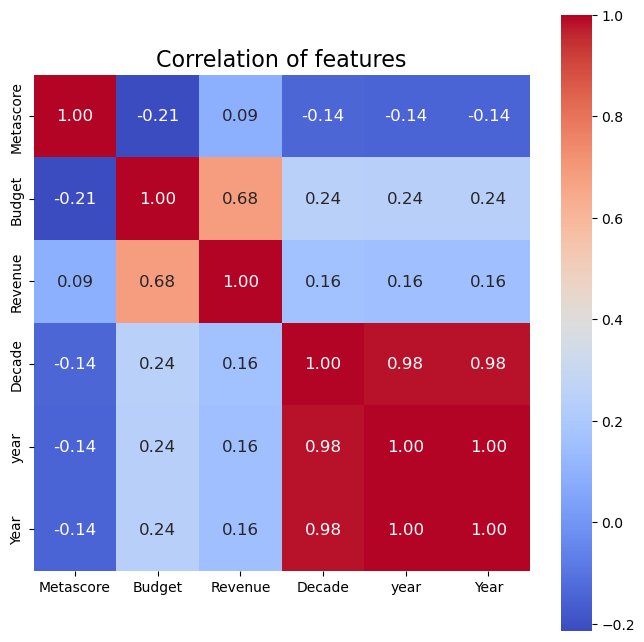

In [85]:
# Creating a heatmap for correlation visualization
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, square=True, ax=ax, annot=True, cmap='coolwarm',fmt='.2f', annot_kws={'size':12})
plt.title('Correlation of features', size=16)
plt.show()

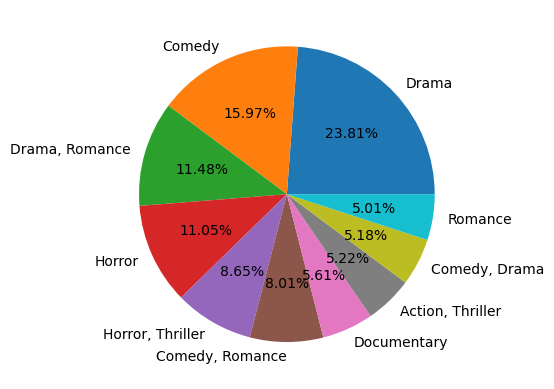

In [48]:
# Genre Distribution using Pie chart
x=df["Genre"].value_counts().head(10)

plt.pie(x, labels=x.index, autopct="%0.2f%%")
plt.show()

Drama, Comedy, Drama,Romance are the top 3 Genres which are most preferred

<BarContainer object of 10 artists>

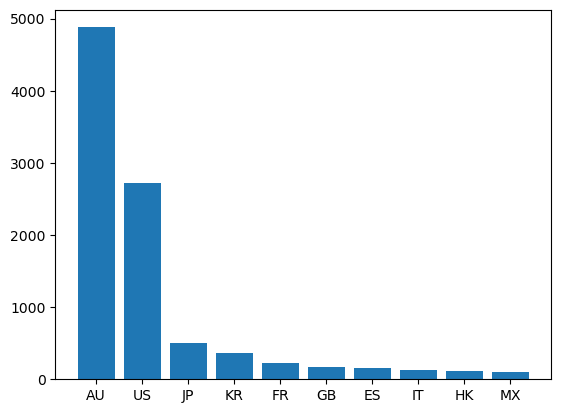

In [49]:
# Country value counts distribution using Bar chart
x=df["Country"].value_counts().head(10)

plt.bar(x.index,height=x)

4885 movies present in the data are from Australia while 2750 movies are from US.

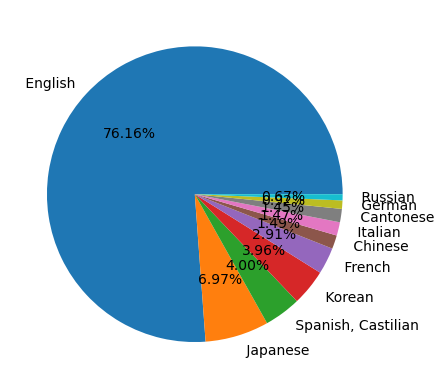

In [52]:
# Language distribution using Pie chart
x= df["Language"].value_counts().head(10)

plt.pie(x, labels=x.index,autopct="%0.2f%%")
plt.show()

 About 75.68% are originally directed in English

<Axes: >

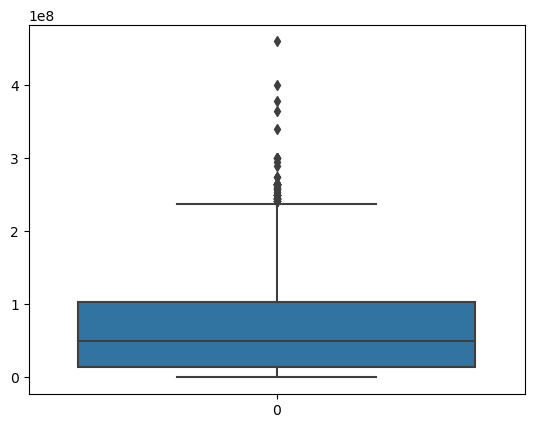

In [53]:
# Budget visualization using Box plot
sns.boxplot(df["Budget"])

<Axes: >

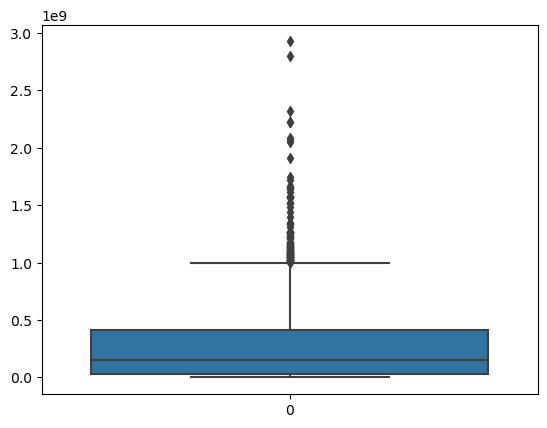

In [54]:
# Revenue visualization using Box plot
sns.boxplot(df["Revenue"])

The outliers are to be handled carefully as there are lot of them.

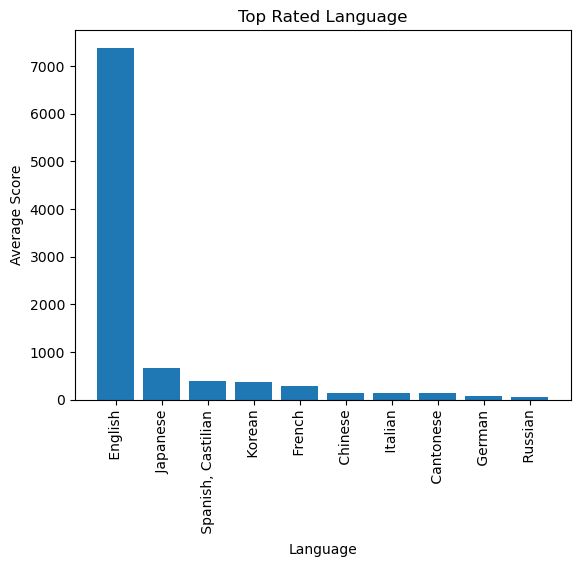

In [61]:
# Top rated languages visualization using bar chart
plt.bar(x.index,height=x)
plt.title('Top Rated Language')
plt.xlabel('Language')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

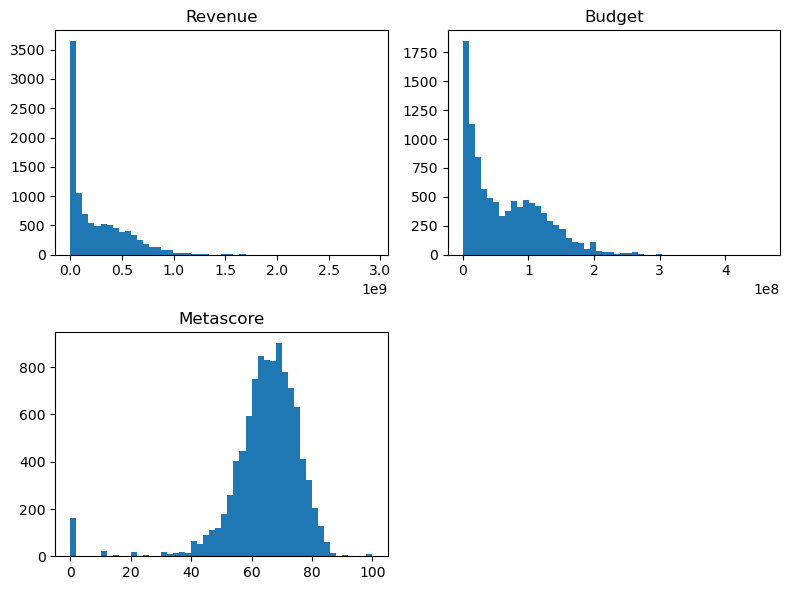

In [64]:
# Metascore, Budget, Revenue visualization using Histogram
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,6))
his1= df['Metascore']
his2= df['Budget']
his3= df['Revenue']

axes[0,0].hist(his3, bins=50)
axes[0,0].set_title('Revenue')
axes[0,1].hist(his2, bins=50)
axes[0,1].set_title('Budget')
axes[1,0].hist(his1, bins=50)
axes[1,0].set_title('Metascore')

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

In [67]:
# Splitting of Date column into a new Decade column
df['Decade'] = df['Date'].str[-5:].astype(int) // 10 * 10
df.head()

,Title,Date,Metascore,Genre,Plot,Cast,Status,Language,Budget,Revenue,Country,Decade
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Released,English,75000000.0,2.716167e+08,AU,2020
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Released,English,460000000.0,2.316795e+09,AU,2020
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",Released,English,100000000.0,7.244590e+08,AU,2020
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2020
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Released,English,77000000.0,3.409420e+08,US,2020


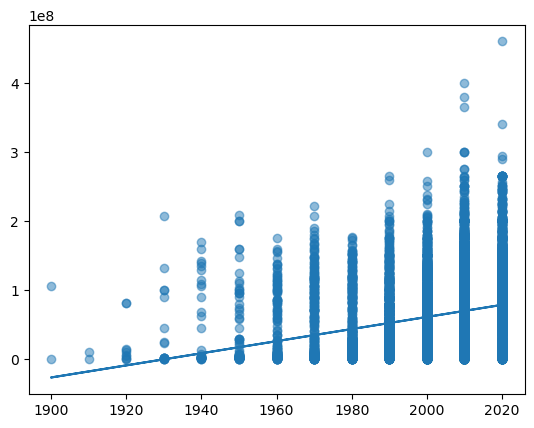

In [69]:
# Scatter plot betwen Decade and Budget
x = df["Decade"]
y = df["Budget"]

plt.scatter(x, y, alpha=0.5)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))

plt.show()

Low budget films are consistent throughout the decades but the range gets larger as time goes on. (more expensive movies)

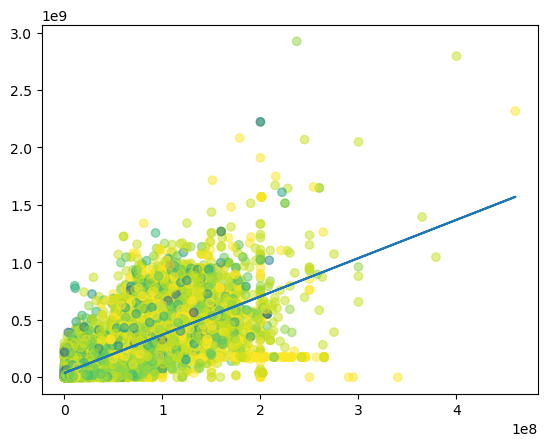

In [70]:
# Scatter plot between Budget and Revenue
x = df["Budget"]
y = df["Revenue"]
colors = df["Decade"]

plt.scatter(x, y, c=colors, alpha=0.5)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))

plt.show()

General positive correlation between budget and revenue, no clear relationship with the decade

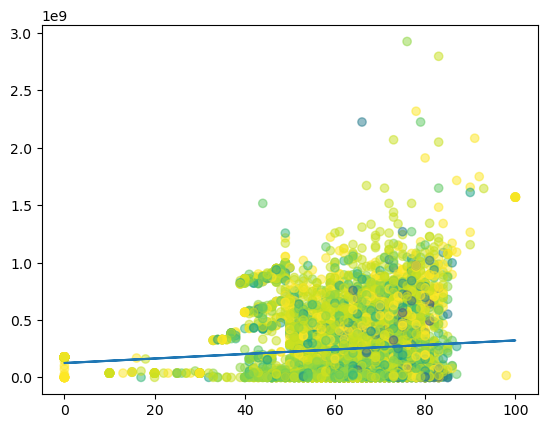

In [71]:
# Scatter plot between Metascore and Revenue
x = df["Metascore"]
y = df["Revenue"]
colors = df["Decade"]

plt.scatter(x, y, c=colors, alpha=0.5)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))

plt.show()

Positive correlation between Metascore and Revenue of the movies

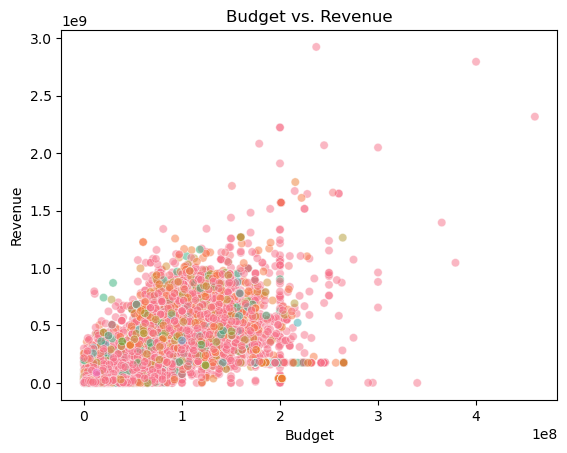

In [74]:
x = df["Budget"]
y = df["Revenue"]
colors = df["Decade"]

sns.scatterplot(data=df, x='Budget', y='Revenue', hue='Language', alpha=0.5, legend = None)

plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')
plt.show()

In [78]:
df['Year'] = df['Date'].str[-5:].astype(int)
df.head()

,Title,Date,Metascore,Genre,Plot,Cast,Status,Language,Budget,Revenue,Country,Decade,year,Year
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Released,English,75000000.0,2.716167e+08,AU,2020,2023,2023
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Released,English,460000000.0,2.316795e+09,AU,2020,2022,2022
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",Released,English,100000000.0,7.244590e+08,AU,2020,2023,2023
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2020,2023,2023
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Released,English,77000000.0,3.409420e+08,US,2020,2023,2023


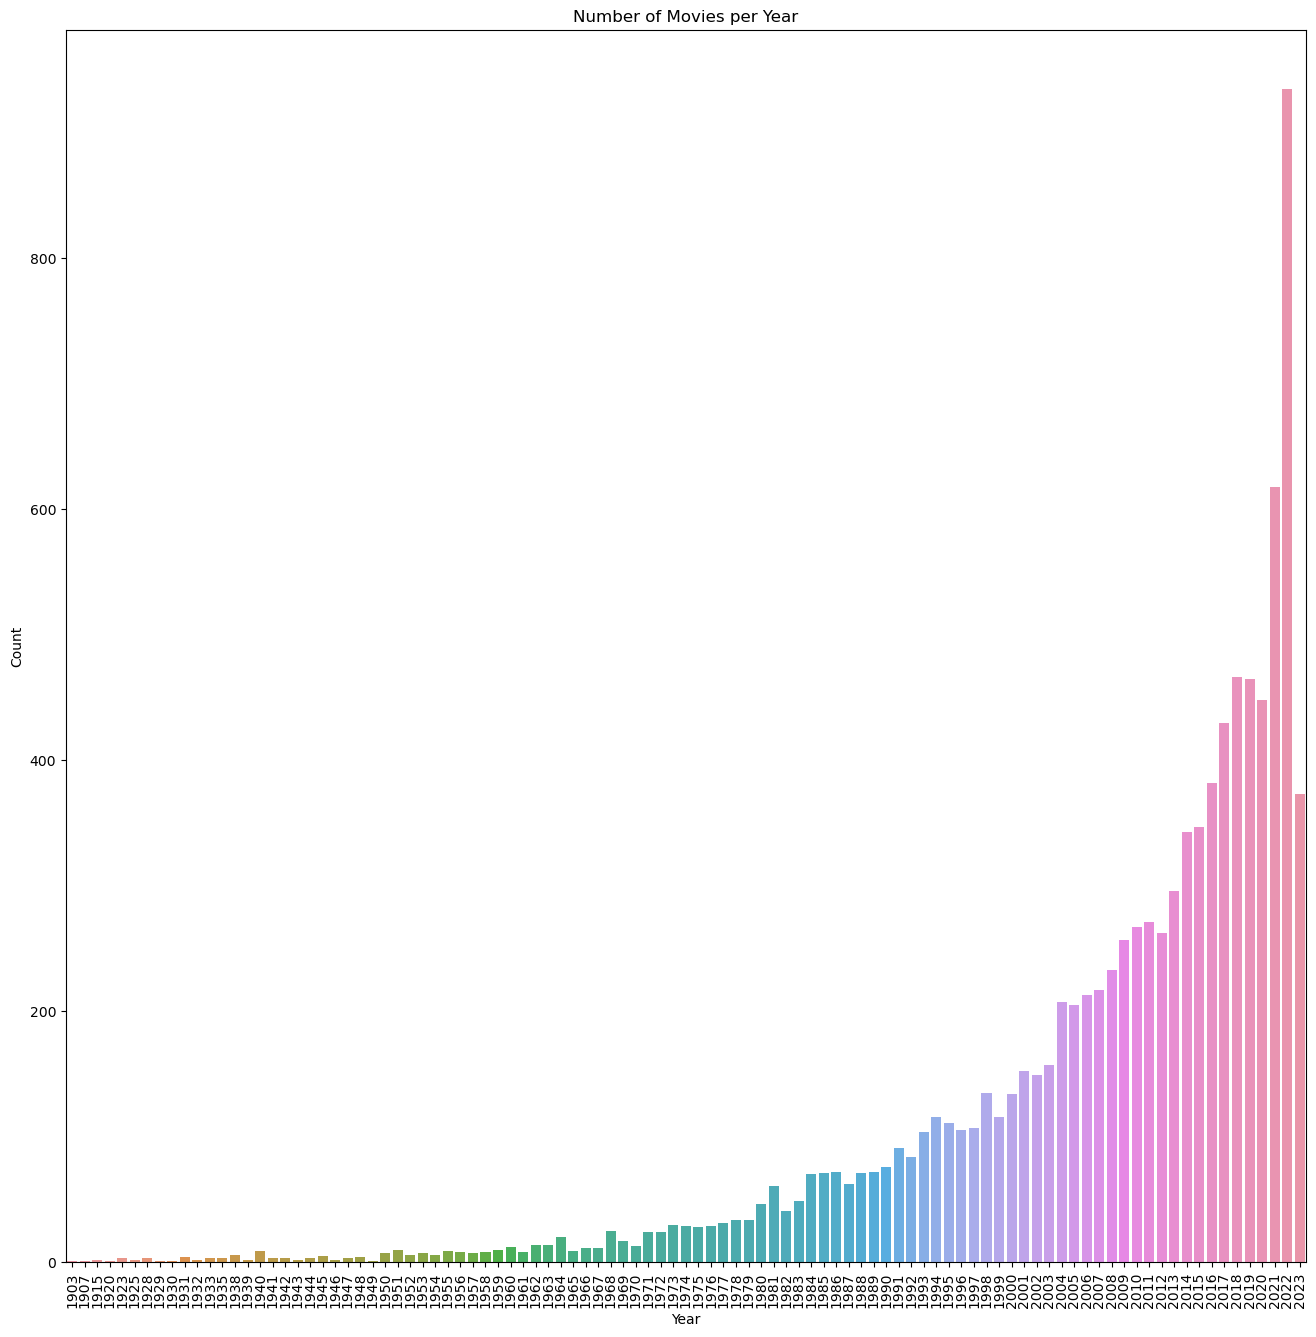

In [79]:
# Movies count in a year visualization using Bar chart
plt.figure(figsize=(16, 16))
sns.countplot(data=df, x='Year')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Movies per Year')
plt.xticks(rotation=90)
plt.show()

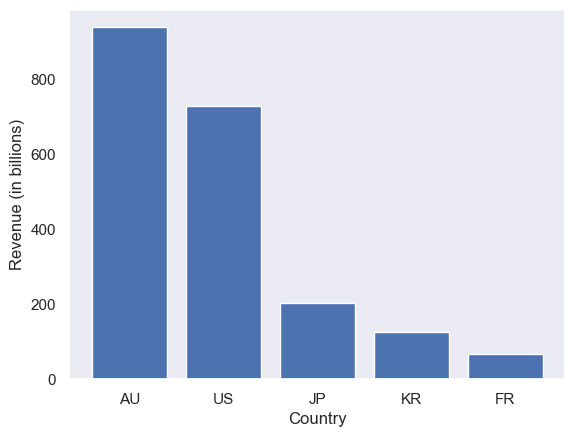

In [100]:
# Top 5 highest Revenue generated Countries 
revenue_by_country = df.loc[:, ['Country', 'Revenue']]
revenue_by_country = revenue_by_country.groupby('Country').sum()
top_5_countries = revenue_by_country.nlargest(5, 'Revenue')
# Create a bar plot
plt.bar(top_5_countries.index, top_5_countries['Revenue']/1000000000)

# Set the x-axis labels
plt.xticks(rotation='horizontal')

# Label the axes
plt.xlabel('Country')
plt.ylabel('Revenue (in billions)')

# Show the plot
plt.show()

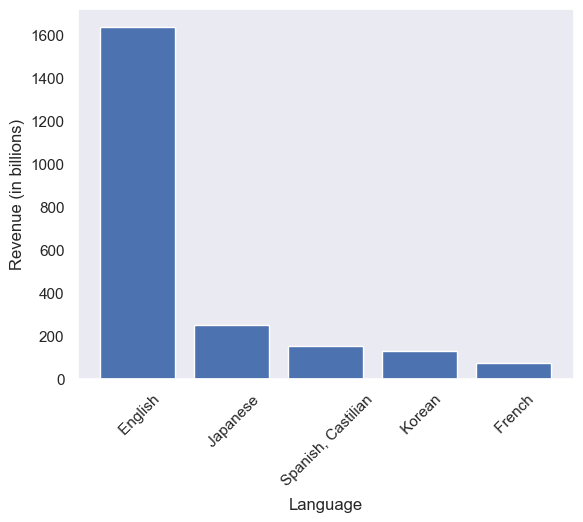

In [101]:
# Top 5 highest Revenue generated Languages
revenue_by_lang = df.loc[:, ['Language', 'Revenue']]
revenue_by_lang = revenue_by_lang.groupby('Language').sum()
top_5_langs = revenue_by_lang.nlargest(5, 'Revenue')

# Create a bar plot
plt.bar(top_5_langs.index, top_5_langs['Revenue']/1000000000)

# Set the x-axis labels
plt.xticks(rotation=45)

# Label the axes
plt.xlabel('Language')
plt.ylabel('Revenue (in billions)')

# Show the plot
plt.show()

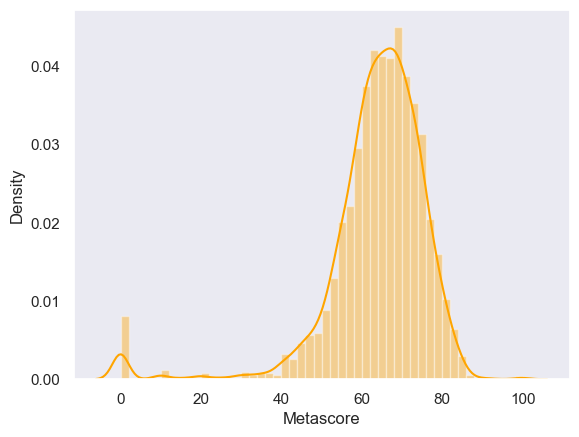

In [95]:
# Distance plot of Metascore
sns.distplot(df['Metascore'], color='orange')
sns.set(style='dark',)
plt.show()

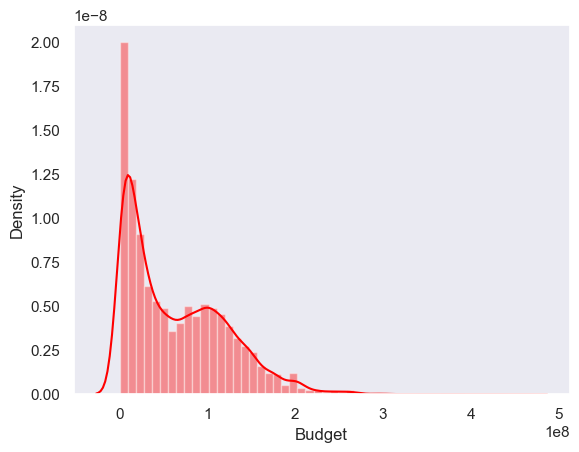

In [93]:
# Distance plot of Budget
sns.distplot(df['Budget'], color='red')
sns.set(style='dark',)
plt.show()

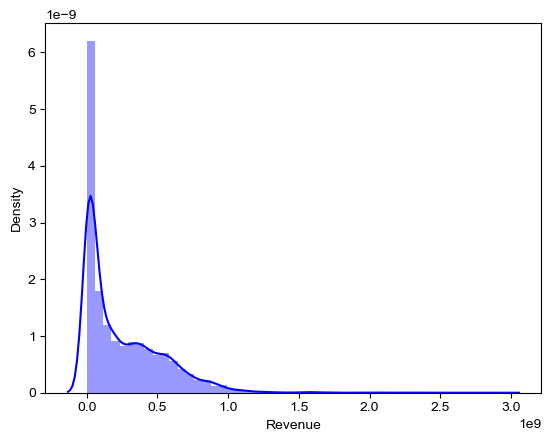

In [91]:
# distance plot of Revenue
sns.distplot(df['Revenue'], color='blue')
sns.set(style='dark',)
plt.show()

In [88]:
# Top 10 Genres according to Metascore
top_rates=df.groupby('Genre').mean().sort_values('Metascore',ascending=False).head(10)
top_rates = top_rates[['Metascore']].round(2)
top_rates.reset_index(inplace=True)
top_rates

,Genre,Metascore
0,"Romance, Animation, Drama",85.00
1,"Fantasy, Drama, Crime",85.00
2,"Adventure, Animation, Comedy, Fantasy, Mystery",85.00
3,"Animation, Comedy, Romance",84.67
4,"Adventure, Fantasy, Action, Family",83.00
5,"Family, Animation, Drama",83.00
6,"TV Movie, Animation, Science Fiction, Action, ...",83.00
7,"Animation, Action, Science Fiction, Drama",83.00
8,"Animation, Thriller",83.00
9,"Adventure, Fantasy, Animation",83.00


In [90]:
# Top 10 Genres according to Budget
top_rates=df.groupby('Genre').mean().sort_values('Budget',ascending=False).head(10)
top_rates = top_rates[['Budget']]
top_rates.reset_index(inplace=True)
top_rates

,Genre,Budget
0,"Fantasy, Action, Comedy",250000000.0
1,"Adventure, Action, Science Fiction, Fantasy",245000000.0
2,"Animation, Adventure, Crime, Family, Comedy",235000000.0
3,"Action, Crime, Thriller, Mystery",231940000.0
4,"Action, Science Fiction, Fantasy, Family",231940000.0
5,"Thriller, Action, Adventure, Science Fiction",220000000.0
6,"TV Movie, Romance, Drama",213940000.0
7,"Comedy, Animation, Family, Action, Adventure",211940000.0
8,"Animation, Comedy, Romance, Drama, Fantasy",208000000.0
9,"Adventure, Animation, Comedy, Fantasy, Mystery",208000000.0


In [89]:
# Top 10 Genres according to Revenue 
top_rates=df.groupby('Genre').mean().sort_values('Revenue',ascending=False).head(10)
top_rates = top_rates[['Revenue']]
top_rates.reset_index(inplace=True)
top_rates

,Genre,Revenue
0,"Adventure, Action, Science Fiction, Fantasy",2.068224e+09
1,"Family, Animation, Adventure, Comedy, Fantasy",1.437863e+09
2,"Family, Animation, Drama",1.316964e+09
3,"Animation, Action, Comedy, Mystery, Crime, Fan...",1.213426e+09
4,"TV Movie, Animation, Science Fiction, Action, ...",1.180869e+09
5,"Action, Science Fiction, Horror, Mystery",1.168753e+09
6,"TV Movie, Thriller, Animation, Crime, Drama, F...",1.165655e+09
7,"Crime, Action, Mystery, Thriller",1.136587e+09
8,"Fantasy, Adventure, Animation, Drama, Science ...",1.125685e+09
9,"Animation, TV Movie, Action, Comedy, Fantasy",1.119422e+09


# Conclusion

Drama, Comedy, Drama,Romance are the top 3 Genres which are most preferred

Australia is the top movies producing country while US is the second followed by Japan and Korea.

English language is the highest rated and most preferred language for movie production followed by Japanese and Spanish. 

There is a positive correlation between the Metascore and Revenue of the movie. The higher the metascore the higher is the Revenue generated. Also, Budget and Revenue are little correlated.

The no.of movies production witnessed a linear increase over the passing of the years. Also, the Budget of the movies hiked over the early 2000's.

The highest Revenue generated was by Australia and US while English languaged movies stood as the top earner in the Revenue.

The EDA and Data Visualization provides an overview of the key variables in the IMDB movies Dataset which includes the distribution of Genre, Budget, Revenue, Language, Metascore. These visualizations serves as a medium for exploring the dataset and determining the relations between the features eventually gaining insights from the data.